In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.shape

(50, 5)

In [ ]:
df.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [ ]:
x=df.drop(['Profit'],axis=1)

In [ ]:
y=df['Profit']

In [ ]:
states = pd.get_dummies(x['State'], drop_first=True)
states.head()

,Florida,New York
0,False,True
1,False,False
2,True,False
3,False,True
4,True,False


In [ ]:
X=df.drop(['State'],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94



Correlation Matrix:


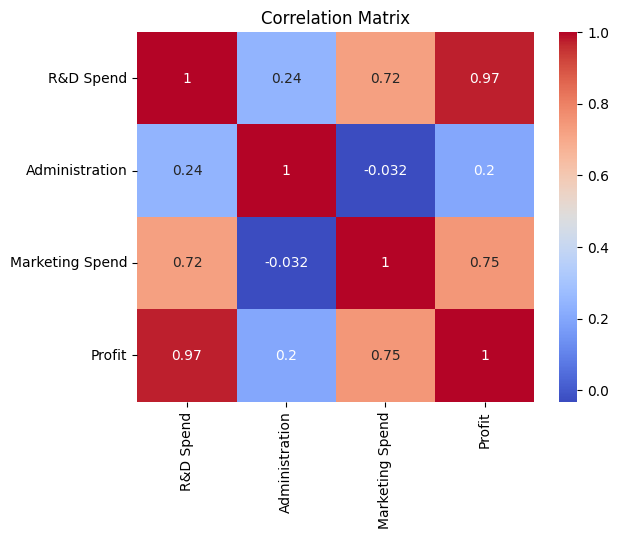

In [ ]:

print("\nCorrelation Matrix:")

numerical_features = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([134307.35,  81005.76,  99937.59,  64926.08, 125370.37,  35673.41,
       105733.54, 107404.34,  97427.84, 122776.86])

In [ ]:
y_test


,Profit
13,134307.35
39,81005.76
30,99937.59
45,64926.08
17,125370.37
48,35673.41
26,105733.54
25,107404.34
32,97427.84
19,122776.86


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

3.9175273810511393e-22

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse
score = r2_score(y_test, y_pred)
score

1.0

In [ ]:
score = r2_score(y_test, y_pred)
score

1.0

/tmp/ipython-input-82-1220666978.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


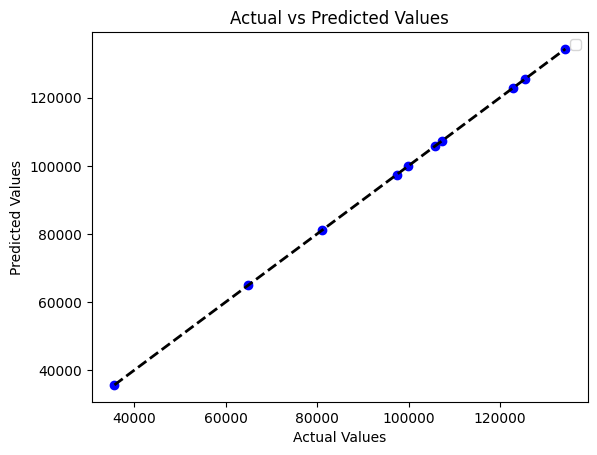

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.legend()
plt.show()

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Now use LinearRegression, which can handle polynomial features
model = LinearRegression()

# If using polynomial features:
model.fit(X_poly, y)
print(model.score(X_poly, y))

# If not using polynomial features (original linear regression):
# model.fit(X, y)
# print(model.score(X, y))

1.0
